# Case - Cientista de dados IHM (Stefanini)

**Definição do Problema**

É comum fazer uso de testes laboratoriais para realizar ações corretivas afim de proporcionar a qualidade ideal de processos, como é o caso neste *dataset*. Normalmente, a análise laboratorial leva uma hora ou mais para verificar o concentrato de silica, tornando o controle do processo lento.

**Dataset**

A primeira coluna mostra o intervalo de tempo e data (de março de 2017 a setembro de 2017). Algumas colunas foram amostradas a cada 20 segundos. Outras foram amostradas em uma base horária ou mais.

A segunda e a terceira colunas são medidas de qualidade da polpa de minério de ferro logo antes de ser alimentada na planta de flotação. A coluna 4 até a coluna 8 são as variáveis ​​mais importantes que impactam na qualidade do minério no final do processo. Da coluna 9 até a coluna 22, podemos ver os dados do processo (nível e fluxo de ar dentro das colunas de flotação, que também impactam na qualidade do minério. As duas últimas colunas são a medição final da qualidade da polpa de minério de ferro do laboratório). O objetivo é prever a última coluna, que é a % de sílica no concentrado de minério de ferro.

**Informações sobre as variáveis**

• Data: Data da medição. (2017-03-10 1:00:00 a 2017-09-09 23:00:00)

• % de ferro: Porcentagem de ferro na pasta sendo alimentada às células de flotação (0-100%).

• % de sílica: Porcentagem de sílica na pasta sendo alimentada às células de flotação. 

• Fluxo de amido: Taxa de fluxo de amido (reativo) medida em m3/h. 

• Fluxo de amina: Taxa de fluxo de amina (reativa) medida em m3/h. 

• Fluxo de polpa de minério: Taxa de fluxo de alimentação de polpa medida em t/h. 

• pH da polpa de minério: pH da polpa, escala de 0 a 14. 

• Densidade da polpa de minério: Densidade da polpa medida em kg/cm³.

• Fluxo de ar da coluna de flotação (1): Taxa de fluxo de ar entrando na célula de flotação 1, medida em Nm³/h.

• Fluxo de ar da coluna de flotação (2): Taxa de fluxo de ar entrando na célula de flotação 2, medida em Nm³/h. 

• Fluxo de ar da coluna de flotação (3): Taxa de fluxo de ar entrando na célula de flotação 3, medida em Nm³/h. 

• Fluxo de ar da coluna de flotação (4): Taxa de fluxo de ar entrando na célula de flotação 4, medida em Nm³/h. 

• Fluxo de ar da coluna de flotação (5): Taxa de fluxo de ar entrando na célula de flotação 5, medida em Nm³/h.  

• Fluxo de ar da coluna de flotação (6): Taxa de fluxo de ar entrando na célula de flotação 6, medida em Nm³/h.

• Fluxo de ar da coluna de flotação (7): Taxa de fluxo de ar entrando na célula de flotação 7, medida em Nm³/h. 

• Nível da coluna de flotação (1): Altura da camada de bolhas no topo da célula de flotação 1, medida em mm. 

• Nível da coluna de flotação (2): Altura da camada de bolhas no topo da célula de flotação 2, medida em mm. 

• Nível da coluna de flotação (3): Altura da camada de bolhas no topo da célula de flotação 3, medida em mm. 

• Nível da coluna de flotação (4): Altura da camada de bolhas no topo da célula de flotação 4, medida em mm. 

• Nível da coluna de flotação (5): Altura da camada de bolhas no topo da célula de flotação 5, medida em mm. 

• Nível da coluna de flotação (6): Altura da camada de bolhas no topo da célula de flotação 6, medida em mm. 

• Nível da coluna de flotação (7): Altura da camada de bolhas no topo da célula de flotação 7, medida em mm. 

• % de concentrado de ferro: Porcentagem de ferro no concentrado no final do processo de flotação (%), obtida por meio de análise laboratorial subsequente. 

*Target*

• % de Silica Concentrate: Porcentagem de sílica no concentrado no final do processo de flotação (%), obtida por meio de análise laboratorial subsequente.

**Objetivo**

Avaliar a viabilidade da utilização de algoritmos de aprendizagem de máquina para prever em tempo real a porcentagem de concentrado de silica da planta de processamento de flotação. Além disso, iremos sugerir parâmetros para otimizar o processo. Portanto, será possivel tomar ações corretivas com antecedência (reduzir a impureza, se for o caso) e também ajudar o meio ambiente (reduzindo a quantidade de minério que vai para os rejeitos à medida que você reduz a sílica no concentrado de minério).

**Proposta de Solução**

1. *Análise exploratória de dados*: Verificar valores nulos, inconsistências e quais as variaveis mais importantes para o processo;
2. *Modelagem de Machine Learning*: Modelo de regressão, com o objetivo de prever o concentrado de silica;
3. *Modelo de otimização*: irá realizar sugestões dos parâmetros controlados do processo, para melhorar o controle.

In [31]:
# Bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'notebook'
import sweetviz as sv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")

## Leitura dos dados

In [2]:
df = pd.read_csv("../database/MiningProcess_Flotation_Plant_Database.csv")

In [3]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


## Limpeza dos dados

Após a leitura dos dados é visivel que o separador decimal é ',' sendo assim faz-se necessario a conversão para '.'

In [4]:
for col in df.drop(columns="date").columns:
    df[col]=df[col].str.replace(',','.').astype(float)

In [5]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [6]:
# Verificando valores duplicados
df.duplicated().sum()

1171

In [7]:
# Verificando valores nulos
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [8]:
# Descrições estatísticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,737453.0,56.294739,5.157744,42.740000,52.670000,56.080000,59.720000,65.78000
% Silica Feed,737453.0,14.651716,6.807439,1.310000,8.940000,13.850000,19.600000,33.40000
Starch Flow,737453.0,2869.140569,1215.203734,0.002026,2076.320000,3018.430000,3727.730000,6300.23000
Amina Flow,737453.0,488.144697,91.230534,241.669000,431.796000,504.393000,553.257000,739.53800
Ore Pulp Flow,737453.0,397.578372,9.699785,376.249000,394.264000,399.249000,402.968000,418.64100
Ore Pulp pH,737453.0,9.767639,0.387007,8.753340,9.527360,9.798100,10.038000,10.80810
Ore Pulp Density,737453.0,1.680380,0.069249,1.519820,1.647310,1.697600,1.728330,1.85325
Flotation Column 01 Air Flow,737453.0,280.151856,29.621288,175.510000,250.281000,299.344000,300.149000,373.87100
Flotation Column 02 Air Flow,737453.0,277.159965,30.149357,175.156000,250.457000,296.223000,300.690000,375.99200
Flotation Column 03 Air Flow,737453.0,281.082397,28.558268,176.469000,250.855000,298.696000,300.382000,364.34600


O proximo passo é ajustar a coluna *date*, segundo informações do dataset temos dois periodos de amostragem, dados em 20s e dados em 1h

In [9]:
df_grouped = df.groupby('date').nunique()
df_grouped

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,1,1,170,159,154,160,127,123,141,122,...,131,146,174,165,174,173,169,174,1,1
2017-03-10 02:00:00,1,1,174,167,157,172,180,95,147,103,...,123,156,176,158,176,177,170,178,1,1
2017-03-10 03:00:00,1,1,171,149,158,169,152,126,152,116,...,136,145,179,175,178,180,174,179,1,1
2017-03-10 04:00:00,1,1,174,153,152,157,94,105,155,111,...,131,153,164,162,168,164,172,170,1,1
2017-03-10 05:00:00,1,1,173,157,165,175,91,134,157,120,...,143,164,177,176,179,173,178,179,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,1,1,179,180,177,152,174,174,178,162,...,179,178,179,179,180,180,180,180,1,1
2017-09-09 20:00:00,1,1,180,176,178,180,180,171,179,173,...,180,177,176,179,180,180,179,180,1,1
2017-09-09 21:00:00,1,1,180,177,180,180,159,170,177,174,...,180,178,179,180,180,180,180,180,1,1


In [49]:
# Calcular a média das contagens de valores únicos por coluna
mean_unique_counts = df_grouped.mean()

# Criar o gráfico de barras usando Plotly
fig = go.Figure()

# Adicionar uma barra para cada coluna, com a média das contagens
fig.add_trace(go.Bar(
    x=mean_unique_counts.index,  # Nomes das colunas no eixo X
    y=mean_unique_counts.values  # Média das contagens no eixo Y
))

# Personalizar o layout
fig.update_layout(
    title='Média de contagens únicas por variável',
    xaxis_title='Variáveis',
    yaxis_title='Média das contagens únicas',
)
# Exportar o gráfico para um arquivo HTML
fig.write_html('mean_unique_counts.html')
# Mostrar o gráfico
fig.show()


Podemos determinar a frequência das variáveis ​​agrupando o dataframe por horas e contando o número de valores exclusivos. Para variáveis ​​horárias, deve ser 1; para variáveis ​​de frequência mais alta, deve ser próximo a 180. Somente as variáveis *Iron Feed* e *Silica Feed* possuem amostragem horárias, o restante parece conter medições a cada 20 segundos. No entando, as variáveis *Iron Concentrate* e *Silica Concentrate* tiveram uma média acima de um, o que pode indicar uma possivel inconsistências nos dados.

In [11]:
df_grouped.loc[df_grouped["% Iron Concentrate"] > 1]

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-12 12:00:00,1,1,168,152,180,180,118,104,147,91,...,123,163,175,174,180,177,173,179,180,180
2017-04-02 08:00:00,1,1,178,179,178,180,178,149,166,163,...,175,178,172,180,180,179,180,180,180,180
2017-04-02 09:00:00,1,1,180,177,174,148,177,145,173,160,...,171,174,160,175,179,176,180,178,180,180
2017-04-03 03:00:00,1,1,177,178,179,180,177,131,179,170,...,156,179,180,178,178,180,179,177,180,180
2017-04-03 12:00:00,1,1,180,175,179,179,143,140,173,167,...,137,163,180,180,178,177,179,177,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-05 21:00:00,1,1,180,180,178,166,176,165,177,171,...,177,179,180,179,180,180,180,179,180,180
2017-09-05 22:00:00,1,1,180,180,179,180,176,168,178,162,...,180,180,179,179,180,180,180,177,180,180
2017-09-05 23:00:00,1,1,179,179,179,180,177,168,180,173,...,178,179,180,179,180,180,180,180,180,180


No periodo acima as variáveis *Iron Concentrate* e *Silica Concentrate* possuem mais de uma medição durante uma hora

In [12]:
df_count = df.groupby('date').count()
df_count

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
2017-03-10 02:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 04:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 05:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 20:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 21:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


In [13]:
# Verificar quais colunas e datas têm contagem diferente de 180
mask_not_180 = df_count.ne(180)

# Filtrar as linhas (datas) e colunas onde a contagem foi diferente de 180
dates_columns_not_180 = df_count[mask_not_180]

# Exibir as datas e as colunas com contagem diferente de 180
dates_columns_not_180_filtered = dates_columns_not_180.dropna(how='all', axis=0).dropna(how='all', axis=1)

dates_columns_not_180_filtered

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,...,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0
2017-04-10 00:00:00,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0


Observa-se que estão faltando seis registros durante a primeira hora e um registro na data *10/04/2017 00:00:00*

In [14]:
df1 = df.set_index('date')

all_hours = pd.Series(data=pd.date_range(start=df1.index.min(), end=df1.index.max(), freq='H'))
mask = all_hours.isin(df1.index.values)
all_hours[~mask]

149   2017-03-16 06:00:00
150   2017-03-16 07:00:00
151   2017-03-16 08:00:00
152   2017-03-16 09:00:00
153   2017-03-16 10:00:00
              ...        
462   2017-03-29 07:00:00
463   2017-03-29 08:00:00
464   2017-03-29 09:00:00
465   2017-03-29 10:00:00
466   2017-03-29 11:00:00
Length: 318, dtype: datetime64[ns]

Embora a verificação anterior não mostre valores ausentes/NaN, também é vital analisar o fator tempo e garantir que haja continuidade temporal nos dados. Note que há uma inconsistência temporal, faltam algumas horas entre *16/03/2017 06:00:00* e *29/03/2017 11:00:00*. Como verificado anteriormente, também estão faltando registros na primeira hora, portanto iremos excluir todos os valores anteriores à *29/03/2017 12:00:00*

In [15]:
df = df1.loc["2017-03-29 12:00:00":]
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2020.55,353.064,404.402,9.74169,1.643469,200.131,196.476,200.909,...,250.828,557.839933,554.531131,659.557429,431.146,422.308,444.326,463.224,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2012.84,356.217,403.180,9.73733,1.637289,199.869,197.219,199.992,...,250.653,560.415400,556.806697,704.130143,433.863,430.954,440.765,461.579,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2007.67,359.371,401.957,9.73298,1.631108,199.607,197.961,199.075,...,250.478,562.990867,559.082262,748.702857,436.580,439.600,437.204,459.935,66.44,1.36
2017-03-29 12:00:00,60.18,9.34,2003.92,362.524,400.735,9.72862,1.624928,199.345,198.703,198.158,...,250.304,565.566333,561.357828,793.275571,439.296,448.246,433.643,458.290,66.44,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.653650,302.344,298.786,299.163,...,313.695,392.160000,430.702000,872.008000,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.653520,303.013,301.879,299.487,...,236.700,401.505000,404.616000,864.409000,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.653380,303.662,307.397,299.487,...,225.879,408.899000,399.316000,867.598000,419.531,503.414,336.035,433.130,64.27,1.71


Para resolver o problema de ter 179 medições em vez de 180 medições para a hora *00:00:00* de *10/04/2017*, duplicarei o último valor da hora 00:00:00 .Em seguida ajustaremos o coluna *date* para conter os segundos

In [16]:
df_cut = df.copy()
df_before = df_cut.loc[:'2017-04-10 00:00:00']
df_after = df_cut.loc['2017-04-10 01:00:00':]
new_date = pd.to_datetime('2017-04-10 00:00:00')
new_data = pd.DataFrame(df_before[-1:].values, index=[new_date], columns=df_before.columns)
df_before = pd.concat([df_before,new_data],axis=0)

df = pd.concat([df_before, df_after])
df.reset_index(allow_duplicates=True, inplace=True)

df["duration"] = 20
df.loc[0,"duration"] = 0
df.duration = df.duration.cumsum()

df['date_seconds'] = pd.Timestamp("2017-03-29 12:00:00") + pd.to_timedelta(df['duration'], unit='s')

df = df.set_index("date_seconds")

In [17]:
df

,index,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,duration
date_seconds,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.649650,200.393,195.734,...,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36,0
2017-03-29 12:00:20,2017-03-29 12:00:00,60.18,9.34,2020.55,353.064,404.402,9.74169,1.643469,200.131,196.476,...,557.839933,554.531131,659.557429,431.146,422.308,444.326,463.224,66.44,1.36,20
2017-03-29 12:00:40,2017-03-29 12:00:00,60.18,9.34,2012.84,356.217,403.180,9.73733,1.637289,199.869,197.219,...,560.415400,556.806697,704.130143,433.863,430.954,440.765,461.579,66.44,1.36,40
2017-03-29 12:01:00,2017-03-29 12:00:00,60.18,9.34,2007.67,359.371,401.957,9.73298,1.631108,199.607,197.961,...,562.990867,559.082262,748.702857,436.580,439.600,437.204,459.935,66.44,1.36,60
2017-03-29 12:01:20,2017-03-29 12:00:00,60.18,9.34,2003.92,362.524,400.735,9.72862,1.624928,199.345,198.703,...,565.566333,561.357828,793.275571,439.296,448.246,433.643,458.290,66.44,1.36,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:58:20,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.653650,302.344,298.786,...,392.160000,430.702000,872.008000,418.725,497.548,446.357,416.892,64.27,1.71,14212700
2017-09-09 23:58:40,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.653520,303.013,301.879,...,401.505000,404.616000,864.409000,418.377,506.398,372.995,426.337,64.27,1.71,14212720
2017-09-09 23:59:00,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.653380,303.662,307.397,...,408.899000,399.316000,867.598000,419.531,503.414,336.035,433.130,64.27,1.71,14212740


In [18]:
df = df.drop(["index","duration"],axis=1)

In [19]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date_seconds,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
2017-03-29 12:00:20,60.18,9.34,2020.55,353.064,404.402,9.74169,1.643469,200.131,196.476,200.909,...,250.828,557.839933,554.531131,659.557429,431.146,422.308,444.326,463.224,66.44,1.36
2017-03-29 12:00:40,60.18,9.34,2012.84,356.217,403.180,9.73733,1.637289,199.869,197.219,199.992,...,250.653,560.415400,556.806697,704.130143,433.863,430.954,440.765,461.579,66.44,1.36
2017-03-29 12:01:00,60.18,9.34,2007.67,359.371,401.957,9.73298,1.631108,199.607,197.961,199.075,...,250.478,562.990867,559.082262,748.702857,436.580,439.600,437.204,459.935,66.44,1.36
2017-03-29 12:01:20,60.18,9.34,2003.92,362.524,400.735,9.72862,1.624928,199.345,198.703,198.158,...,250.304,565.566333,561.357828,793.275571,439.296,448.246,433.643,458.290,66.44,1.36


## EDA

In [20]:
# Reamostrar os dados para uma frequência de 1 hora e utilizar o primeiro registro de cada hora
df_resampled_1h = df.resample('1H').first()
df_resampled_1h.index.names = ['Date']

In [21]:
df_resampled_1h.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.990000,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
2017-03-29 13:00:00,60.18,9.34,2510.360000,306.635,402.303,9.63786,1.524512,200.165,194.286,201.929,...,250.188,851.772761,809.863864,881.307250,447.543,421.279,446.697,413.322,66.57,1.43
2017-03-29 14:00:00,60.18,9.34,2138.230000,435.199,401.953,9.61320,1.594940,199.540,197.436,198.605,...,250.488,850.510694,774.266870,886.773000,470.638,455.341,457.393,456.480,66.64,1.33
2017-03-29 15:00:00,60.18,9.34,458.079000,476.878,400.173,9.75149,1.638440,199.951,191.456,199.265,...,249.582,858.052225,778.343085,883.777182,438.033,446.859,423.184,483.157,66.41,1.27
2017-03-29 16:00:00,59.54,9.56,145.349632,252.088,399.484,9.96978,1.521080,199.072,182.430,201.251,...,250.760,853.745107,782.419299,883.715800,435.285,434.663,452.469,436.865,63.63,5.50


In [22]:
# Verificar valores duplicados
df_resampled_1h.duplicated().sum()

0

In [23]:
# Verificar valores nulos
df_resampled_1h.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [24]:
# Informações sobre o dataset
df_resampled_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3948 entries, 2017-03-29 12:00:00 to 2017-09-09 23:00:00
Freq: H
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3948 non-null   float64
 1   % Silica Feed                 3948 non-null   float64
 2   Starch Flow                   3948 non-null   float64
 3   Amina Flow                    3948 non-null   float64
 4   Ore Pulp Flow                 3948 non-null   float64
 5   Ore Pulp pH                   3948 non-null   float64
 6   Ore Pulp Density              3948 non-null   float64
 7   Flotation Column 01 Air Flow  3948 non-null   float64
 8   Flotation Column 02 Air Flow  3948 non-null   float64
 9   Flotation Column 03 Air Flow  3948 non-null   float64
 10  Flotation Column 04 Air Flow  3948 non-null   float64
 11  Flotation Column 05 Air Flow  3948 non-null   float64
 12  Flotation Column 0

In [25]:
# Descrições estatísticas
df_resampled_1h.describe().T

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,3948.0,56.220301,5.231150,42.740000,52.610000,55.940000,59.720000,65.780000
% Silica Feed,3948.0,14.767789,6.887711,1.310000,8.812500,14.200000,20.140000,33.400000
Starch Flow,3948.0,2820.090346,1232.414946,0.561482,2046.280000,2956.825000,3715.035000,6288.990000
Amina Flow,3948.0,488.476292,91.730712,241.702368,431.995000,504.364000,555.275000,739.304000
Ore Pulp Flow,3948.0,397.404409,9.783743,376.291000,394.041500,399.180000,402.872729,418.600000
Ore Pulp pH,3948.0,9.769578,0.387149,8.753375,9.527458,9.799725,10.039825,10.807792
Ore Pulp Density,3948.0,1.679404,0.068696,1.519837,1.646205,1.696475,1.726345,1.852825
Flotation Column 01 Air Flow,3948.0,281.293540,29.624629,175.847339,250.373254,299.427000,300.160250,372.442637
Flotation Column 02 Air Flow,3948.0,278.173193,30.196829,177.560227,250.790250,296.690500,300.856000,367.251000
Flotation Column 03 Air Flow,3948.0,282.271296,28.401445,176.941580,251.270250,298.828000,300.465000,304.541000


In [50]:
# Gráfico temporal de todas as variáveis
fig = go.Figure()

for col in df_resampled_1h.columns:
    fig.add_trace(go.Scatter(x=df_resampled_1h.index, y=df_resampled_1h[col], mode='lines', name=col))

fig.update_layout(title='Séries temporais de todas as variáveis', xaxis_title='Data', yaxis_title='Valor')
# Exportar o gráfico para um arquivo HTML
fig.write_html('time_series_all_variables.html')
fig.show()

In [51]:
# Criar uma figura do tipo boxplot
fig = go.Figure()

# Adicionar um boxplot para cada variável
for column in df_resampled_1h.columns:
    fig.add_trace(go.Box(y=df_resampled_1h[column], name=column))

# Configurações do layout para melhorar a aparência
fig.update_layout(
    title="Boxplot Interativo",
    xaxis_title="Variáveis",
    yaxis_title="Valores",
    showlegend=True,
    height=700
)
# Exportar o gráfico para um arquivo HTML
fig.write_html('boxplot_interativo.html')
# Exibir o gráfico
fig.show()

Visualmente, através dos boxplots univariados, observa-se que a maioria das minhas variáveis ​​não tem outliers ou tem bem poucos, com exceção de algumas colunas como: Ore Pulp Flow, Flotation Columns Air Flow (4, 5, 6, 7)

### Sweetviz

Componentes do Relatório Sweetviz:

1. **Resumo Geral**:
    - *Informações Básicas*: Mostra o número de linhas, colunas, e tipos de dados;
    - *Distribuição de Valores*: Exibe a distribuição dos valores para cada coluna, incluindo contagem de valores nulos.
2. **Análise de Colunas**:
    - *Distribuição de Valores*: Exibe a distribuição dos valores para cada coluna, incluindo contagem de valores nulos;
    - *Estatísticas Descritivas*: Inclui média, mediana, desvio padrão, valores mínimos e máximos, quartis, (continuar);
    - *Contagem de Valores Nulos*: Mostra a contagem de valores nulos para cada coluna;
    - *Correlação com a Variável Alvo*: Exibe a correlação entre a coluna e a variável alvo.
3. **Análise de Correlação**:
    - *Matriz de Correlação*: Mostra a matriz de correlação entre todas as colunas numéricas;
    - *Heatmap de Correlação*: Visualiza a matriz de correlação como um heatmap.
4. **coeficiente de assimetria (skewness)**: O *skew* refere-se à assimetria da distribuição dos dados e ajuda a identificar se a distribuição é simétrica, assimétrica positiva (cauda à direita) ou assimétrica negativa (cauda à esquerda).
    - *Skew* ≈ 0: A distribuição é aproximadamente simétrica.
    - *Skew* > 0: A distribuição é assimétrica positiva (maior parte dos valores concentrados à esquerda, com uma cauda mais longa à direita).
    - *Skew* < 0: A distribuição é assimétrica negativa (maior parte dos valores concentrados à direita, com uma cauda mais longa à esquerda).
5. **kurtose (kurtosis)**: A kurtose mede a forma das caudas de uma distribuição em comparação com a distribuição normal, ou seja, ela indica o quão concentrados ou espalhados estão os valores nas extremidades da distribuição.
    - *Kurt* > 3 (Leptocúrtica): A distribuição tem caudas mais pesadas e um pico mais alto em comparação à distribuição normal. Isso indica que a distribuição tem mais valores concentrados nas caudas, sugerindo maior probabilidade de valores extremos (outliers).
    - *Kurt* = 3 (Mesocúrtica): A distribuição tem uma forma semelhante à distribuição normal em termos de caudas e pico. Uma distribuição normal tem kurtose exatamente igual a 3 (ou 0 se considerada excess kurtosis, que subtrai 3 do valor).
    - *Kurt* < 3 (Platicúrtica): A distribuição tem caudas mais leves e um pico mais baixo, sendo mais "achatada" do que a distribuição normal. Isso significa que há menos valores extremos e a distribuição é mais espalhada.

O relatório Sweetviz fornece uma visão abrangente e detalhada dos dados, facilitando a identificação de padrões, correlações e possíveis problemas nos dados.

In [25]:
my_report = sv.analyze(df_resampled_1h, target_feat='% Silica Concentrate')
my_report.show_html(filepath='eda_sweetviz.html', 
            open_browser=True, 
            layout='widescreen', 
            scale=None)

                                             |          | [  0%]   00:00 -> (? left)

Report eda_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
## Descomentar para exibir no notebook

# my_report.show_notebook(  w=None, 
#                 h=None, 
#                 scale=None,
#                 layout='widescreen',
#                 filepath=None,
#                 file_layout=None,
#                 file_scale=None)

Pode-se observar que várias variáveis ​​têm uma distribuição mais ou menos normal, com exceção das sete colunas Air Flow. Também temos que a distribuição das variáveis ​​de alimentação (% ferro Feed e % Silica Feed) tem um comportamento de espelho quase inverso. Esse comportamento inverso faz sentido (quanto mais % de ferro estiver presente na alimentação, menos volume disponível para outros elementos como impurezas de sílica, e vice-versa), comprovamos tal comportamento inverso ao verificar que ambas colunas são altamente correlacionadas negativamente, ou seja, são inversamente proporcionais.

### Model

As operações de mineração geralmente envolvem uma alimentação constante de minério bruto que precisa ser processada continuamente para garantir uma produção estável e eficiente.  Variáveis como fluxo de reagentes, fluxo de ar, pH e níveis de flotação são ajustadas em tempo real para manter a operação em um estado ideal, o que é característico de processos contínuos. O controle automático dessas variáveis permite ajustes instantâneos baseados nos dados coletados dos sensores, garantindo uma operação eficientem. Deste modo, iremos desenvolver um modelo de *machine learning* que irá prever o concetrado de silica e faremos uso de um algoritmo de otimização para sugerir os melhores valores das *features* para que o processo fique ainda mais robusto e com a menor % de silica concentrada

In [29]:
X = df_resampled_1h.drop(columns=['% Iron Concentrate', '% Silica Concentrate'])
y = df_resampled_1h['% Silica Concentrate']

In [30]:
X.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level'],
      dtype='object')

Para este desáfio iremos considerar algumas premissas importantes, sendo elas:

1. Iremos trabalhar com um modelo de regressão e não vamos levar em consideração o contexto do tempo (time serie), pois o objetivo é prever o centrato de silica utilizando as demais variáveis;
2. Não utilizarem a variável *% Iron Concentrate* pois ela também é fornecida em teste laboratorial;
3. Assumiremos que as variáveis: 'Starch Flow', 'Amina Flow', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level','Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level' podem ser alteradas manualmente;
4. Teremos os valore de '% Iron Feed' e '% Silica Feed' a cada uma hora, pois são medidas de qualidade da polpa de minério de ferro antes de ser alimentada na planta de flotação;
5. As variáveis 'Ore Pulp Flow' e 'Ore Pulp Density' não podem ser controladas facilmente.

#### Train model

Vamos treinar um modelo baseline, utilizando Regressão Linear e um modelo XGBoost

Para este case, iremos utilizar as seguintes metricas de avaliação:
1. MSE (Erro Médio Quadrático) : Calcula a média dos erros ao quadrado, dando mais peso a erros maiores;
2. R2 (R-quadrado): Mede a proporção da variância na variável dependente que é previsível a partir das variáveis independentes incluídas no modelo;
3. RMSE (Root Mean Squared Error): É a raiz quadrada do MSE. Mantém as memas unidades que os valores de saída, o que facilita a interpretação em comparação com o MSE;
4. MAPE (Mean Absolute Percentage Error): Mede a precisão das previsões como uma porcentagem do valor real

##### LinearRegression

In [33]:
# Dividir os dados em treino e teste (80% para treino, 20% para teste)
entrada_treino, entrada_teste, saida_treino, saida_teste = train_test_split(X, y, test_size=0.2, random_state=17)

# Baseline
model_base = LinearRegression()

# Realizando o treinamento
model_base.fit(entrada_treino, saida_treino)

# Fazendo previsões no conjunto de teste
y_pred = model_base.predict(entrada_teste)

# Avaliando as métricas no conjunto de teste
r2 = r2_score(saida_teste, y_pred)
mse = mean_squared_error(saida_teste, y_pred)

print("R2 no conjunto de teste: ", r2)
print("MSE no conjunto de teste: ", mse)

R2 no conjunto de teste:  0.1655651092592647
MSE no conjunto de teste:  1.022971473743937


##### XGBoost

O XGBoost (Extreme Gradient Boosting) é um dos algoritmos mais populares e poderosos para problemas de aprendizado supervisionado, especialmente em competições de machine learning e ambientes de produção. A razão para sua ampla adoção se deve a uma combinação de alta performance, flexibilidade e capacidade de ajustar-se a diferentes tipos de dados e tarefas. A escolha do modelo deu-se pelos fatores: alto desempenho e precisão, regularização incorporada, feature importance, capacidade de lidar com outliers e dados ruidosos e cross-validation embutido.

In [34]:
# Dividir os dados em treino e teste (80% para treino, 20% para teste)
entrada_treino, entrada_teste, saida_treino, saida_teste = train_test_split(X, y, test_size=0.2, random_state=17)

# Criando o modelo XGBoost para regressão

params = {'learning_rate': 0.015255801728179088, 'max_depth': 8, 'n_estimators': 677, 'min_child_weight': 8, 'gamma': 0.2773708095772495, 
                     'subsample': 0.9354517115818112, 'colsample_bytree': 0.5495240963021251, 'reg_alpha': 0.5140888816190217, 'reg_lambda': 0.2481400296087546}

model = XGBRegressor(**params)

# Realizando a validação cruzada
scores_r2 = cross_val_score(model, entrada_treino, saida_treino, cv=3, scoring='r2')
scores_mse = cross_val_score(model, entrada_treino, saida_treino, cv=3, scoring='neg_mean_squared_error')

# Exibindo as pontuações de cada dobra
print("Pontuações de validação cruzada - R2: ", scores_r2)
print("Pontuações de validação cruzada - MSE: ", -scores_mse)

# Calculando a média das pontuações de validação cruzada
print("R2 médio da validação cruzada: ", np.mean(scores_r2))
print("MSE médio da validação cruzada: ", -np.mean(scores_mse))

# Treinando o modelo com todos os dados de treinamento
eval_set = [(entrada_treino, saida_treino), (entrada_teste, saida_teste)]
model.fit(entrada_treino, saida_treino, eval_set=eval_set, verbose=True)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(entrada_teste)

# Avaliando as métricas no conjunto de teste
r2 = r2_score(saida_teste, y_pred)
mse = mean_squared_error(saida_teste, y_pred)

print("R2 no conjunto de teste: ", r2)
print("MSE no conjunto de teste: ", mse)

Pontuações de validação cruzada - R2:  [0.28087141 0.27558259 0.30531054]
Pontuações de validação cruzada - MSE:  [0.8396431  0.93426058 0.95112361]
R2 médio da validação cruzada:  0.2872548453719408
MSE médio da validação cruzada:  0.9083424287391831
[0]	validation_0-rmse:1.12385	validation_1-rmse:1.10377
[1]	validation_0-rmse:1.11765	validation_1-rmse:1.10003
[2]	validation_0-rmse:1.11200	validation_1-rmse:1.09674
[3]	validation_0-rmse:1.10600	validation_1-rmse:1.09310
[4]	validation_0-rmse:1.09944	validation_1-rmse:1.08973
[5]	validation_0-rmse:1.09333	validation_1-rmse:1.08722
[6]	validation_0-rmse:1.08771	validation_1-rmse:1.08393
[7]	validation_0-rmse:1.08166	validation_1-rmse:1.08055
[8]	validation_0-rmse:1.07560	validation_1-rmse:1.07709
[9]	validation_0-rmse:1.07017	validation_1-rmse:1.07454
[10]	validation_0-rmse:1.06430	validation_1-rmse:1.07167
[11]	validation_0-rmse:1.05863	validation_1-rmse:1.06860
[12]	validation_0-rmse:1.05295	validation_1-rmse:1.06524
[13]	validation_0

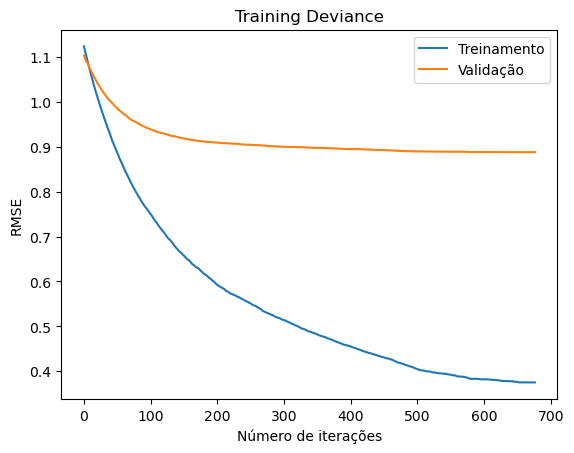

In [35]:
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Treinamento')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validação')
ax.legend()
plt.ylabel('RMSE')
plt.xlabel('Número de iterações')
plt.title('Training Deviance')
plt.show()

In [36]:
results = pd.DataFrame(columns=['y_real', 'y_pred'])
results['y_real'] = saida_teste
results['y_pred'] = y_pred
results['absolute error'] = np.abs(saida_teste-y_pred)
results['percentage error'] = (np.abs(saida_teste-y_pred)/saida_teste)*100
results

,y_real,y_pred,absolute error,percentage error
Date,,,,
2017-07-11 13:00:00,1.14,1.876333,0.736333,64.590583
2017-08-28 21:00:00,4.43,3.770650,0.659350,14.883744
2017-08-06 16:00:00,2.54,2.179746,0.360254,14.183232
2017-08-28 17:00:00,5.53,3.558676,1.971324,35.647808
2017-06-13 15:00:00,2.14,1.902197,0.237803,11.112290
...,...,...,...,...
2017-06-15 19:00:00,1.80,1.953327,0.153327,8.518183
2017-08-13 16:00:00,2.65,2.631670,0.018330,0.691707
2017-08-31 22:00:00,4.12,3.036218,1.083782,26.305384


In [52]:
# Gráfico do valor real x valor previsto
fig = px.scatter(results, x='y_real', y='y_pred', title='Valor real x Valor previsto')
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=results['y_real'].min(), y0=results['y_real'].min(),
    x1=results['y_real'].max(), y1=results['y_real'].max()
)
fig.update(
    layout=dict(xaxis_title='Valor real', yaxis_title='Valor previsto')
)
# Exportar o gráfico para um arquivo HTML
fig.write_html('real_vs_pred.html')
fig.show()

##### Feature importance

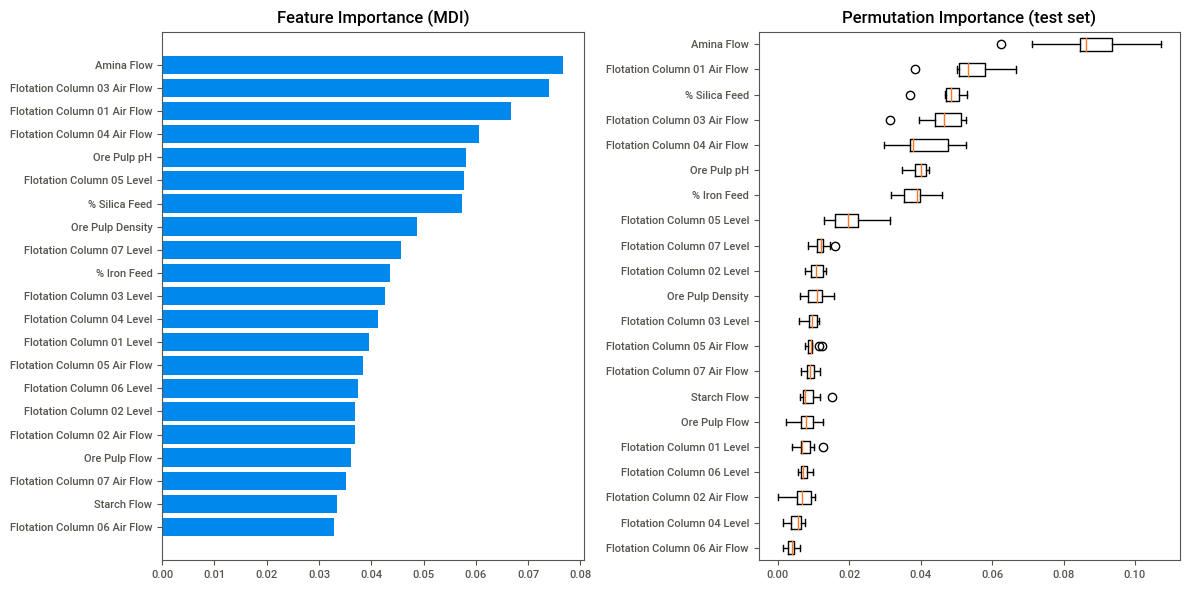

In [34]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, entrada_teste, saida_teste, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

O gráfico *Feature Importance (MDI)* mostra a importância das características calculada pelo modelo utilizando o método Mean Decrease in Impurity (MDI). As barras horizontais representam a importância de cada característica, ordenadas da menos importante para a mais importante. Já o gráfico *Permutation Importance (test set)* mostra a importância das características utilizando a técnica de Permutation Importance. A importância é medida ao permutar aleatoriamente os valores de cada característica e observar a mudança na performance do modelo. Cada caixa no gráfico representa a distribuição das importâncias calculadas ao longo de várias permutações.

#### Optimize params: dual annealing

Por fim, faremos uso do algoritmo *dual annealing* para realizar sugestões de parâmetros, a proposta é que a cada nova entrada de *Iron Feed* e *Silica Feed* o modelo faça uma otimização para os demais parâmetros, exceto *Ore Pulp Flow* e *Ore Pulp Density*

In [54]:
import numpy as np
from scipy.optimize import dual_annealing

Iron_Feed = 60.18	
Silica_Feed = 9.34
Ore_Pulp_Flow = 402.303	
Ore_Pulp_Density = 1.524512

# Definir a função objetivo para a otimização
def objective_function(Iron_Feed, Silica_Feed, Ore_Pulp_Flow, Ore_Pulp_Density, params):
    Iron_Feed_array = np.full((1, 1), Iron_Feed, dtype=np.float32)
    Silica_Feed_array = np.full((1, 1), Silica_Feed, dtype=np.float32)
    Ore_Pulp_Flow_array = np.full((1, 1), Ore_Pulp_Flow, dtype=np.float32)
    Ore_Pulp_Density_array = np.full((1, 1), Ore_Pulp_Density, dtype=np.float32)
    
    # Separar os parâmetros que precisam ser otimizados
    starch_flow = params[0]
    amina_flow = params[1]
    ore_pulp_ph = params[2]
    air_flows = params[3:10]  # Fluxo de ar das colunas de flotação 01 a 07
    levels = params[10:]  # Níveis das colunas de flotação 01 a 07
    
    # Construir a matriz de parâmetros na ordem correta
    all_params = np.concatenate((
        Iron_Feed_array, 
        Silica_Feed_array, 
        np.array([[starch_flow]], dtype=np.float32),
        np.array([[amina_flow]], dtype=np.float32),
        Ore_Pulp_Flow_array, 
        np.array([[ore_pulp_ph]], dtype=np.float32),
        Ore_Pulp_Density_array, 
        np.array([air_flows], dtype=np.float32), 
        np.array([levels], dtype=np.float32)
    ), axis=1)
    
    # Prever o valor de % Silica Concentrate
    prediction = model.predict(all_params)
    # Retornar o valor previsto (queremos minimizar este valor)
    return prediction[0]

# Função de chamada para avaliar a função objetivo
def evaluate(params):
    return np.abs(objective_function(Iron_Feed, Silica_Feed, Ore_Pulp_Flow, Ore_Pulp_Density, params))

# Parâmetros do Dual Annealing
num_params = 17  # Número de parâmetros 

# Obter os limites inferiores e superiores
upper_bounds = df[['Starch Flow', 'Amina Flow', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 
              'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 
              'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level','Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 
              'Flotation Column 07 Level']].max().values # Valores máximos das variáveis de entrada
lower_bounds = df[['Starch Flow', 'Amina Flow', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 
              'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 
              'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level','Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 
              'Flotation Column 07 Level']].min().values # Valores minimos das variáveis de entrada

# Converter os limites em uma lista de tuplas
bounds = list(zip(lower_bounds, upper_bounds))

# Número de iterações
num_iterations = 1000

# Executar o Dual Annealing
result = dual_annealing(evaluate, bounds, maxiter=num_iterations, seed=17)

# Melhor configuração de parâmetros encontrada
best_params = result.x
best_value = result.fun

print("Melhor configuração de parâmetros encontrada:", best_params)
print("Valor mínimo da função objetivo:", best_value)


Melhor configuração de parâmetros encontrada: [3877.68612406  323.18542989   10.2655244   304.3671244   179.3365388
  299.8224419   297.45280216  302.04267819  247.24028492  249.51519164
  450.78744268  398.7218381   146.12580392  401.8401408   391.36535511
  355.26212081  402.46899086]
Valor mínimo da função objetivo: 0.8615055


In [56]:
names_params = ['Starch Flow', 'Amina Flow', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 
              'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 
              'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level','Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 
              'Flotation Column 07 Level']

df_best_params = pd.DataFrame([best_params], columns=names_params)
df_best_params.insert(0, '% Iron Feed', Iron_Feed)
df_best_params.insert(1, '% Silica Feed', Silica_Feed)
df_best_params.insert(4, 'Ore Pulp Flow', Ore_Pulp_Flow)
df_best_params.insert(6, 'Ore Pulp Density', Ore_Pulp_Density)


In [57]:
df_best_params

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,60.18,9.34,3877.686124,323.18543,402.303,10.265524,1.524512,304.367124,179.336539,299.822442,...,302.042678,247.240285,249.515192,450.787443,398.721838,146.125804,401.840141,391.365355,355.262121,402.468991


In [58]:
df_best_params.T

,0
% Iron Feed,60.180000
% Silica Feed,9.340000
Starch Flow,3877.686124
Amina Flow,323.185430
Ore Pulp Flow,402.303000
Ore Pulp pH,10.265524
Ore Pulp Density,1.524512
Flotation Column 01 Air Flow,304.367124
Flotation Column 02 Air Flow,179.336539
Flotation Column 03 Air Flow,299.822442


In [59]:
# Predito pelo modelo com os parâmetros otimizados
predict_optimize = model.predict(df_best_params.values.reshape(1, -1))
predict_optimize

array([0.8615055], dtype=float32)

In [60]:
# Valor do modelo sem otimização
df_resampled_1h.iloc[1]

% Iron Feed                       60.180000
% Silica Feed                      9.340000
Starch Flow                     2510.360000
Amina Flow                       306.635000
Ore Pulp Flow                    402.303000
Ore Pulp pH                        9.637860
Ore Pulp Density                   1.524512
Flotation Column 01 Air Flow     200.165000
Flotation Column 02 Air Flow     194.286000
Flotation Column 03 Air Flow     201.929000
Flotation Column 04 Air Flow     295.096000
Flotation Column 05 Air Flow     306.400000
Flotation Column 06 Air Flow     250.194000
Flotation Column 07 Air Flow     250.188000
Flotation Column 01 Level        851.772761
Flotation Column 02 Level        809.863864
Flotation Column 03 Level        881.307250
Flotation Column 04 Level        447.543000
Flotation Column 05 Level        421.279000
Flotation Column 06 Level        446.697000
Flotation Column 07 Level        413.322000
% Iron Concentrate                66.570000
% Silica Concentrate            

In [61]:
# Predito pelo modelo
predict_model = model.predict(X.iloc[1].values.reshape(1, -1))
predict_model

array([1.8860544], dtype=float32)

In [62]:
# Valor real
y.iloc[1]

1.43

## Conclusion

**Resultados**

O valor de R2 indica que aproximadamente 35.7% da variação nos dados de teste pode ser explicada pelo modelo. Embora positivo, este valor sugere que o modelo tem uma capacidade moderada de explicação. O MSE quantifica o erro médio ao quadrado entre os valores previstos e os valores reais. Um MSE de 0.789 indica que o modelo tem uma diferença média ao quadrado de cerca de 0.789 unidades entre as previsões e os valores reais. Esses resultados indicam que o modelo tem algum poder de previsão, mas não captura toda a variabilidade dos dados, além disso como fazemos uso um algoritmo de otimização, precisamos que o modelo seja o mais preciso possivel, para que as sugestões realizadas sejam acertivas.

**Considerações Finais e Pontos de Melhoria para Melhores Resultados**

Neste case técnico, foram aplicados algumas análises e procedimentos de ciência de dados, para demonstração de conhecimentos técnicos. Para uma modelagem real, pode-se aplicar uma grande variedades de técnicas e modelagens que demandam grande tempo de desenvolvimento e análises.

Para futuras oportunidades, poderia ser aplicados:
1. Features enginner: Extração de novas features ou retirada de features sem valores em nossa modelagem;
2. Utilizam de métodos de normalização dos dados;
3. Testar outros algoritmos de *machine learning*;
4. Ajuste fino de hiperparametros;
5. Criação de novas features, como por exemplo utilizar a variável *target* com atraso;
6. Fazer uso de *Conformal Predict*, que é uma abordagem estatística que fornece intervalos de confiança válidos para previsões feitas por modelos de *machine learning*.